# Interactive feature data exploration
A common use-case is to interactively explore features. This can be done in a scatter plot that is connected to the label image its measurements originate from, e.g. in [stackview clusterplot](https://github.com/haesleinhuepf/stackview?tab=readme-ov-file#scatterplot-and-clusterplot).

In [1]:
from skimage.io import imread
from skimage.measure import label
import numpy as np
import stackview
import pandas as pd
from napari_simpleitk_image_processing import label_statistics

C:\Users\rober\miniforge3\envs\bio9\lib\site-packages\networkx\utils\backends.py:135: RuntimeWarning: networkx backend defined more than once: nx-loopback
  backends.update(_get_backends("networkx.backends"))


As a starting point, we first need to get a label image and extract features from it.

In [2]:
image = imread('data/blobs.tif')

[[0 0 0 ... 5 5 5]
 [0 0 0 ... 5 5 5]
 [0 0 0 ... 5 5 5]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
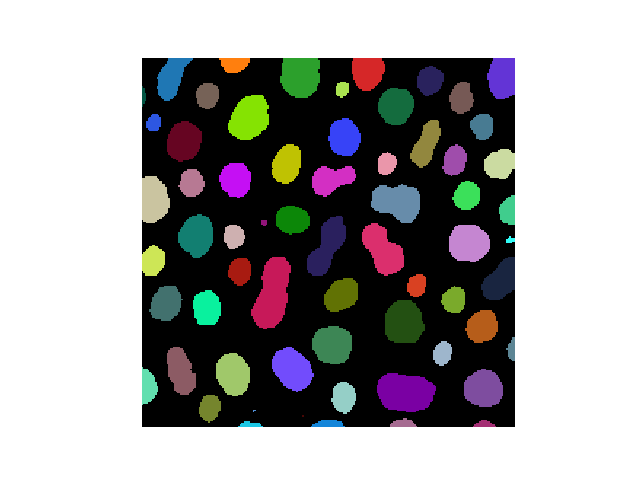

In [3]:
label_image = label(image > 120)

stackview.insight(label_image)

In [4]:
df = pd.DataFrame(label_statistics(image, label_image,  
                              size=True,
                              shape=True, 
                              perimeter=True, 
                              position=True,
                              moments=True))

df

,label,maximum,mean,median,minimum,sigma,sum,variance,bbox_0,bbox_1,...,number_of_pixels_on_border,perimeter,perimeter_on_border,perimeter_on_border_ratio,principal_axes0,principal_axes1,principal_axes2,principal_axes3,principal_moments0,principal_moments1
0,1,232.0,190.854503,200.0,128.0,30.304925,82640.0,918.388504,10,0,...,17,89.196525,17.0,0.190590,0.902586,0.430509,-0.430509,0.902586,17.680049,76.376232
1,2,224.0,179.286486,184.0,128.0,21.883314,33168.0,478.879436,53,0,...,21,53.456120,21.0,0.392846,-0.051890,-0.998653,0.998653,-0.051890,8.708186,27.723954
2,3,248.0,205.617021,208.0,128.0,29.380812,135296.0,863.232099,95,0,...,23,93.409370,23.0,0.246228,0.988608,0.150515,-0.150515,0.988608,49.978765,57.049896
3,4,248.0,217.327189,232.0,128.0,36.061134,94320.0,1300.405402,144,0,...,19,75.558902,19.0,0.251459,0.870813,0.491615,-0.491615,0.870813,33.246984,37.624111
4,5,248.0,212.142558,224.0,128.0,29.904270,101192.0,894.265349,237,0,...,39,82.127941,40.0,0.487045,0.998987,0.045005,-0.045005,0.998987,24.584386,60.694273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,60,128.0,128.000000,128.0,128.0,0.000000,128.0,0.000000,110,246,...,0,2.681517,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
60,61,248.0,183.407407,176.0,128.0,34.682048,14856.0,1202.844444,170,248,...,19,41.294008,19.0,0.460115,-0.005203,-0.999986,0.999986,-0.005203,2.190911,21.525901
61,62,216.0,181.511111,184.0,128.0,25.599001,16336.0,655.308864,116,249,...,23,48.093086,23.0,0.478239,-0.023708,-0.999719,0.999719,-0.023708,1.801689,31.523372
62,63,248.0,188.377358,184.0,128.0,38.799398,9984.0,1505.393324,227,249,...,16,34.264893,16.0,0.466950,0.004852,-0.999988,0.999988,0.004852,1.603845,13.711214


In the following cell, you can interact with the data. You need to run this notebook to see the graphical interface.

In [5]:
stackview.clusterplot(df, label_image, column_x="number_of_pixels", column_y="perimeter")

# Exercise
Plot elongation against flatness. Try to explain what you see.

Load the [skimage.data.cells3d](https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.cells3d), 
segment the cells, measure and plot elongation and flatness.